In [1]:
from wordcloud import WordCloud

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
rawDf=pd.read_csv("sample.csv")

In [4]:
sequance=''.join(rawDf["sequance"])
control=''.join(rawDf["control"])

In [5]:
print(len(sequance),len(control))

17371538 17371538


In [2]:
#dnaHomoSapiens="GACCTATATTGCCGCTGATGAAGCGACAAAACAGGCGATGGTGGAAGTGGTCTATGGCCGCTCCCTCTATGCCGGGGCGGCTCACGGGCCGTCGCCTACCGGTAATCCCAGGGCATTGATCATTGGCAGCCNNNNNNNNNNNNGNTGGACAGGGTTACGGGCGATATCCAGCACGGCGTCGGTAAAGGCGTTGCAGGCGGTGGAGCATCGTGGCGTCGATAGCAACTGGCTGGCCGTTCTTGTCAGCGTGGTCGCGCTGACTATCCTGGGCATTACTCTGCTGGTTTCTTTATTTGCGTCATTAACGGCTTTAAAGCCATCCAGATCCATAAACAGTAGCGCGAAAGACGTGCCTTCCCGATTCGCTTTGCTGATGGCCTGTTCCAGACGATCCT"
#control="AAGGGAGGIIIIIIIIIIIGGIIIIIIIIIGIIIIIIGIIIIIIIIIIIGIGIGIIIIIIIIIIIIIIIIIIIIGIIIIIGIIIIIIGGGIGIIGIIIIIIAGAGGIIIIIIIIGIIIGIGIIIIIIIIII############<#<<GGIGIGIIIIIIIIIIGIIIIIIIGIGGGIIIIIIIIGIIIIIIIIIIIIGIIGIGGIIGGIGGIIGGGGGGGGAGGGGGGGGGGGGGGIIIGGGIIGGIGGAGIGGGI<GGGIGGGGGIGIGGAGGGIAGIGGIGGGIIIGGGGGGI<GAGAGGGIIIIIIIIIGGG.GGGGIGGIGGGGIIIGGIIGGGGIIGGIIGGIIGGGGGGIIGGIIIGGIGIIIIIGAGGGGGGGGGGGGGGIIIGGGGG"

Örüntülerin DNA sequance ından çıkarılması

Örüntülerden en uzununun karakter sayısı

In [7]:
maxLenght=4

In [9]:
dd=[]
for i,c in enumerate(control):    
    if i == 0:
        continue
    item=ord(control[i])
    itemBefore=ord(control[i-1])
    if item <= itemBefore:
        continue
    for j in range(maxLenght):
        if i-j>0:
            s=sequance[i-j:i]
            if len(s)>1 :
                dd.append({"str":s,"val":control[i]+control[i-1],
                           "valInt":item-itemBefore,
                          "location":str(int(i/200))+"-"+str(i%20)})

In [10]:
df=pd.DataFrame(dd)
df["strlen"]=df["str"].str.len()
df["count"]=df.groupby(["str"])["str"].transform("count")
df.head()

,location,str,val,valInt,strlen,count
0,0-4,CT,GF,1,2,341682
1,0-4,GCT,GF,1,3,82377
2,0-6,AT,FE,1,2,249165
3,0-6,TAT,FE,1,3,41389
4,0-9,GC,B=,5,2,260673


In [11]:
df.to_csv("pattern_loc.csv")

In [12]:
sc=df[df["count"]>22000]
sc=sc[sc["strlen"]>2]
sc.head()

,location,str,val,valInt,strlen,count
1,0-4,GCT,GF,1,3,82377
3,0-6,TAT,FE,1,3,41389
5,0-9,TGC,B=,5,3,72635
7,0-10,GCA,CB,1,3,85284
9,0-11,CAA,EC,2,3,70468


In [20]:
sc.to_csv("pattern_3.csv")

[Text(0, 0, 'GCT'),
 Text(0, 0, 'TAT'),
 Text(0, 0, 'TGC'),
 Text(0, 0, 'GCA'),
 Text(0, 0, 'CAA'),
 Text(0, 0, 'AAG'),
 Text(0, 0, 'AGA'),
 Text(0, 0, 'AGC'),
 Text(0, 0, 'CCG'),
 Text(0, 0, 'GGT'),
 Text(0, 0, 'TGA'),
 Text(0, 0, 'GAA'),
 Text(0, 0, 'ACA'),
 Text(0, 0, 'GAG'),
 Text(0, 0, 'AGT'),
 Text(0, 0, 'GTG'),
 Text(0, 0, 'TGG'),
 Text(0, 0, 'CAT'),
 Text(0, 0, 'GTC'),
 Text(0, 0, 'TCC'),
 Text(0, 0, 'TAA'),
 Text(0, 0, 'GGA'),
 Text(0, 0, 'CAC'),
 Text(0, 0, 'TCT'),
 Text(0, 0, 'TGT'),
 Text(0, 0, 'TTC'),
 Text(0, 0, 'CCC'),
 Text(0, 0, 'CTT'),
 Text(0, 0, 'CTC'),
 Text(0, 0, 'CCA'),
 Text(0, 0, 'CGT'),
 Text(0, 0, 'CCT'),
 Text(0, 0, 'CTG'),
 Text(0, 0, 'TTA'),
 Text(0, 0, 'CTA'),
 Text(0, 0, 'CGA'),
 Text(0, 0, 'AGG'),
 Text(0, 0, 'GGG'),
 Text(0, 0, 'ACC'),
 Text(0, 0, 'TCA'),
 Text(0, 0, 'ATG'),
 Text(0, 0, 'ATT'),
 Text(0, 0, 'TTT'),
 Text(0, 0, 'TTG'),
 Text(0, 0, 'GGC'),
 Text(0, 0, 'ATA'),
 Text(0, 0, 'AAA'),
 Text(0, 0, 'GAC'),
 Text(0, 0, 'GAT'),
 Text(0, 0, 'AAT'),


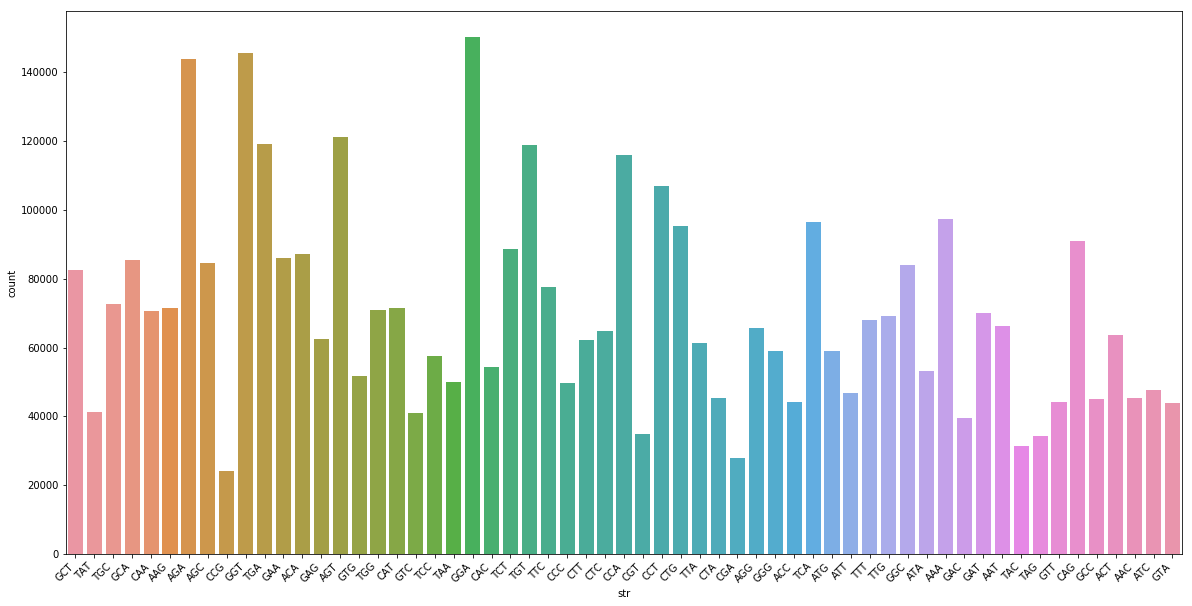

In [13]:
plt.figure(figsize=(20,10))
chart = sns.countplot(sc["str"])
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, horizontalalignment='right')

In [ ]:
text=""
text = "".join(review for review in sc["str"])
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
sc=sc.sort_values(by='valInt', ascending=False)
sc.head()

,location,str,val,valInt,strlen,count
7922207,81017-12,GGG,I#,38,3,59071
7887409,80683-12,AAC,I#,38,3,45213
7856775,80389-8,GCT,I#,38,3,82377
7895483,80759-12,GCC,I#,38,3,45077
7920879,81003-16,CCG,I#,38,3,24148


In [ ]:
sc=sc.sort_values(by='str', ascending=False)
sc.head()

In [19]:
import numpy as np

No handles with labels found to put in legend.


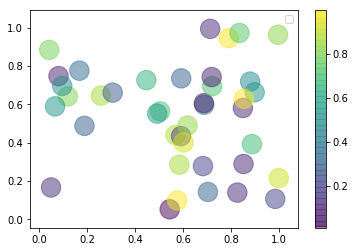

In [28]:
N = 40
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
plt.scatter(sc.str,y,s=sc.valInt*10, alpha=0.5,c=colors,cmap='viridis')
plt.legend(numpoints=1)
plt.colorbar();

In [31]:
sc.describe()

,valInt,strlen,count
count,4.251322e+06,4251322.0,4.251322e+06
mean,4.052984e+00,3.0,8.121990e+04
std,4.975489e+00,0.0,3.301949e+04
min,1.000000e+00,3.0,1.586700e+04
25%,1.000000e+00,3.0,5.907100e+04
50%,2.000000e+00,3.0,7.263500e+04
75%,5.000000e+00,3.0,9.726100e+04
max,3.800000e+01,3.0,1.502440e+05


In [16]:
dsc=sc.groupby("str").agg({'valInt': ['min','max','mean','sum',"count"]})

In [17]:
dsc.to_csv("group_3_minmax.csv")

In [18]:
#dsc=pd.read_csv("group_10_minmax.csv")
dsc.head(10)

valInt                              
       min max      mean     sum   count
str                                     
AAA      1  38  3.617195  351812   97261
AAC      1  38  3.939862  178133   45213
AAG      1  38  3.964784  283601   71530
AAT      1  38  3.753358  248720   66266
ACA      1  38  3.788898  330210   87152
ACC      1  38  3.862256  170619   44176
ACT      1  37  3.705583  236016   63692
AGA      1  38  4.283895  615373  143648
AGC      1  38  4.465786  376890   84395
AGG      1  38  4.284852  281819   65771

In [61]:
dsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
str     64 non-null object
min     64 non-null int64
max     64 non-null int64
mean    64 non-null float64
sum     64 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.6+ KB


KeyError: 'str'

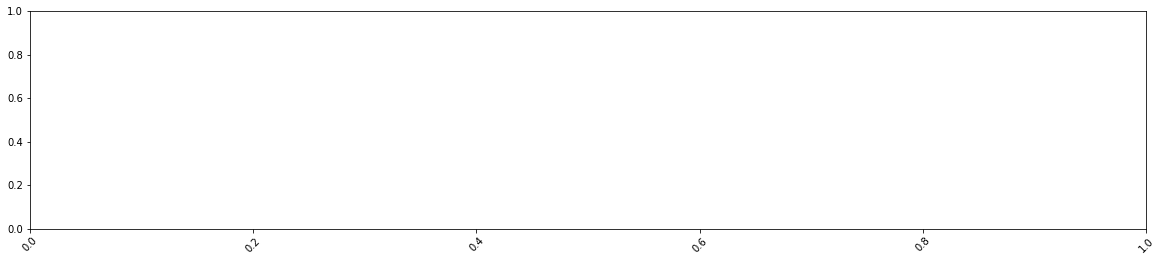

In [19]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
plt.bar(dsc["str"], dsc["max"])
plt.bar(dsc["str"], dsc["mean"])
plt.bar(dsc["str"], dsc["min"])
plt.legend(["max","mean","min"])